# Selected Solutions from "All of Statistics"

## Chapter 7: Estimating the CDF and Statistical Functionals

### 7.3
(Computer Experiment.) Generate 100 observations from a N(0,1) dis- tribution. Compute a 95 percent confidence band for the cdf F (as described in the appendix). Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat us- ing data from a Cauchy distribution.

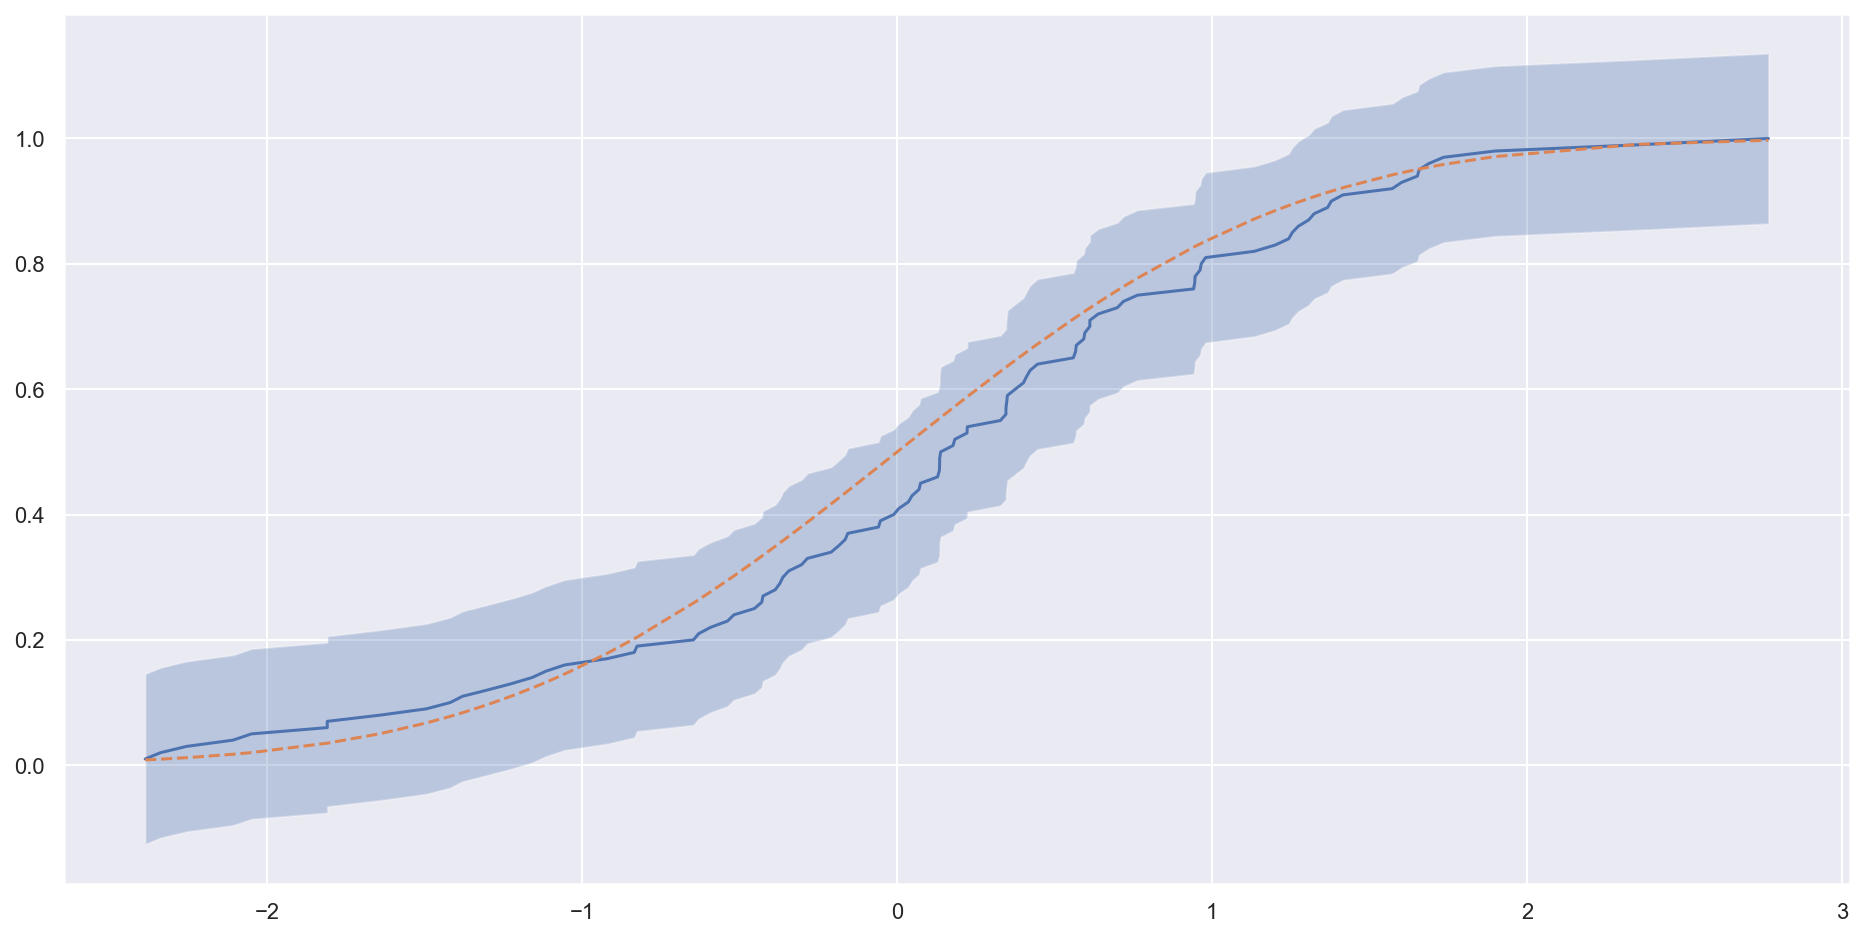

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set_theme()

alpha, n = 0.05, 100
eps = np.sqrt(np.log(2/alpha)/(2*n))
percents = (1+np.arange(n))/n

observs = np.sort(np.random.normal(size=n))
F_obs = norm.cdf(observs)

plt.figure(figsize=(16,8))
sns.lineplot(x=observs,y=percents)
plt.fill_between(observs, percents-eps, percents+eps, alpha=.3)
sns.lineplot(x=observs,y=norm.cdf(observs),linestyle='--');

Even with such a large confidence interval, we'll see that $\alpha=5\%$ of the time, at least one of the $n=100$ points will lie outside the CIs. Let's do $1000$ trials of constructing CIs and see how often the worst residual lies outside of epsilon ($\epsilon=13.6\%\;\mathrm{for}\;n=100$)

In [ ]:
n_trials = 1000
trials = np.zeros(n_trials)

for i in range(len(trials)):
    obs = np.sort(np.random.normal(size=n))
    F_obs = norm.cdf(obs)
    worst = np.abs(F_obs-percents).max()
    trials[i] = worst

trials.sort()

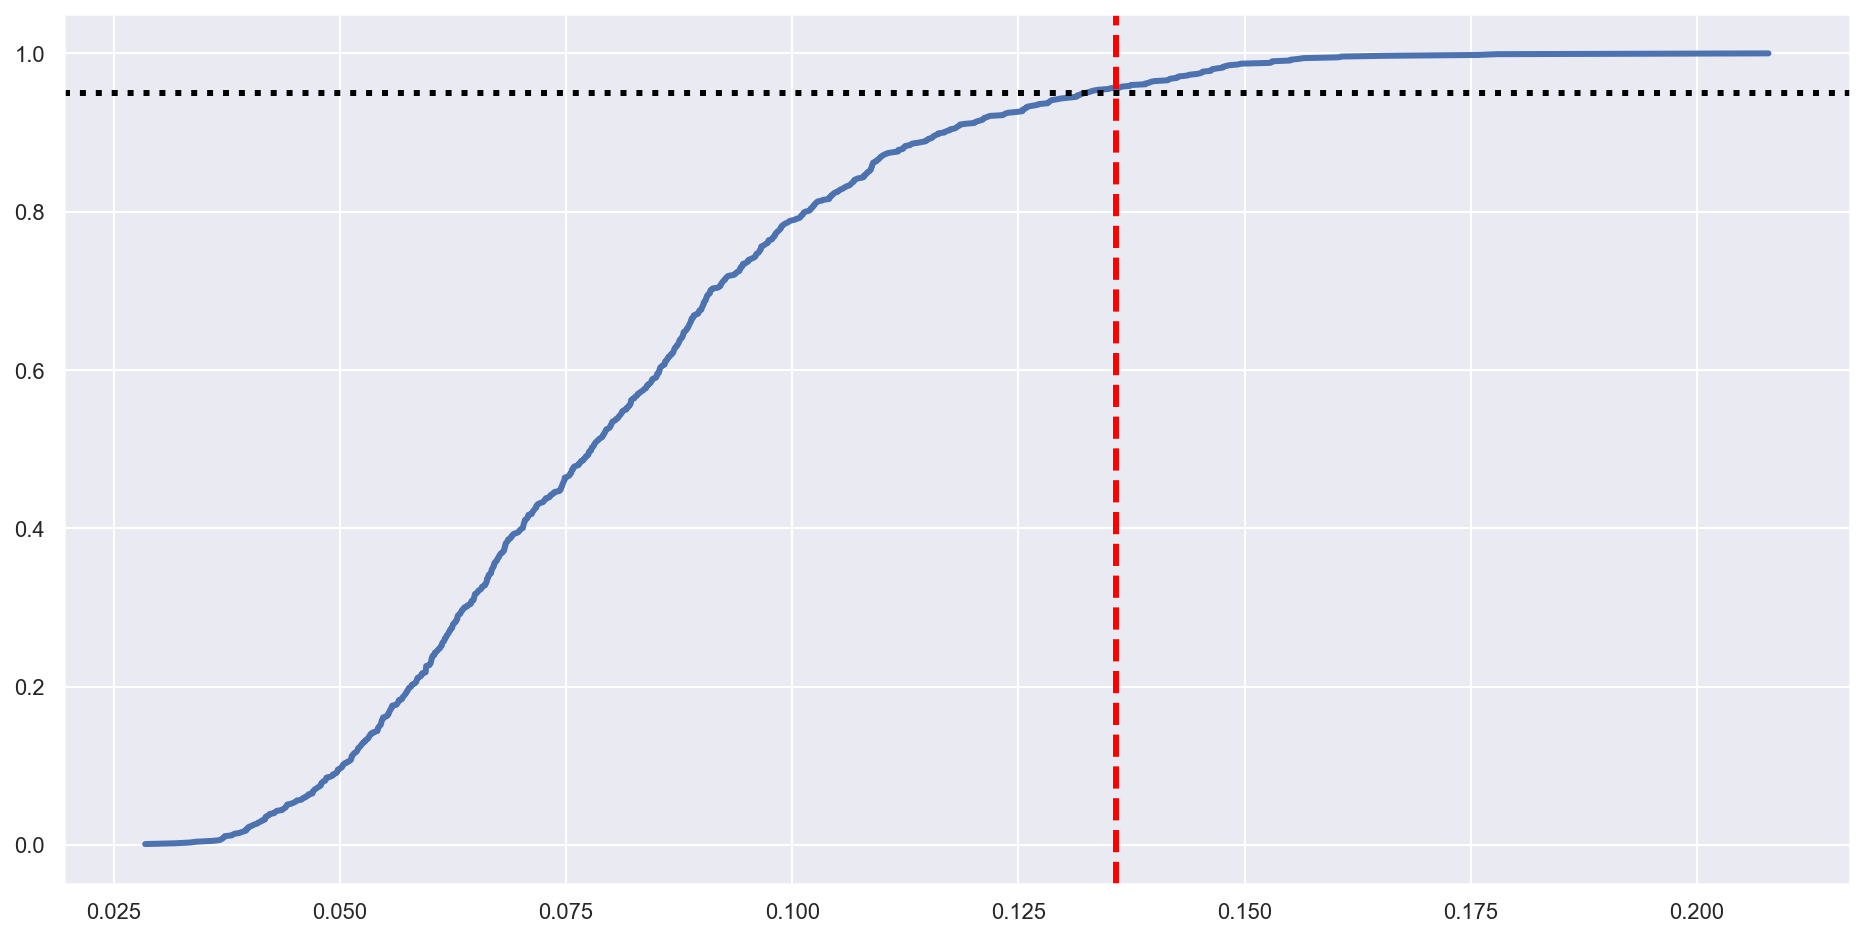

In [117]:
plt.figure(figsize=(16,8))
trials_plot = sns.lineplot(x=trials,y=(1+np.arange(n_trials))/n_trials,);
trials_plot.axhline(1-alpha,color='black',linestyle=':',linewidth = 3);
trials_plot.axvline(eps,color='red',linestyle='--',linewidth=3);